In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import pathlib as plb
from statistics import mean
from scipy import stats

In [16]:
metadata = pd.read_csv('/Volumes/LaCie/_2021_08_screen/S1_ub_ia.csv', index_col=0)
loc_path = plb.Path('/Volumes/LaCie/_2021_08_screen/ai/')

In [11]:
ref_comps = ['40', '96', '25', '62' ,'54']
ref_bool = metadata["Compound"].isin(ref_comps)
ref_df = metadata[ref_bool]

1. Grab location file for each row
2. Calculate mean X for each location file
3. Plot CI v mean X 

In [18]:
def add_meanX(row):
    fid = "loc_" + row['File Name'] + "_" + row['WellNo'] + ".csv"
    loc_dat = pd.read_csv(loc_path.joinpath(fid), index_col=0)
    loc_mean = int(mean(loc_dat['X']))
    return loc_mean

metadata['Mean X']=metadata.apply(
    lambda row: add_meanX(row), axis=1)
    


In [26]:
def addSize(row):
    if row['Total Worms'] <= 150:
        size = 1
    elif (row['Total Worms']>150) & (row['Total Worms']<=250):
        size = 2
    elif (row['Total Worms']>250) & (row['Total Worms']<=350):
        size = 3
    elif (row['Total Worms']>350) & (row['Total Worms']<=450):
        size = 4
    elif row['Total Worms']>450:
        size = 5
    return size
   
metadata['Size']=metadata.apply(
    lambda row: addSize(row), axis=1)
metadata.head()

,WellNo,Total Worms,Chemotaxis,Compound,File Name,Well width,Plate ID,Mean X,Mean X mm,Size
8,3A,229.0,-0.265957,5-Aminolevulinic acid (hydrochloride),S1_002,3058.0,S1_R1_7,1774,37.744681,2
9,3B,275.0,-0.125541,Isobutanol,S1_002,3065.0,S1_R1_7,1662,35.361702,3
10,3C,231.0,-0.353535,Methyl palmitate,S1_002,3043.0,S1_R1_7,1803,38.361702,2
11,3D,221.0,-0.255814,Safranal,S1_002,3075.0,S1_R1_7,1739,37.000000,2
12,4A,270.0,-0.176991,Spinosad,S1_002,3051.0,S1_R1_8,1665,35.425532,3


In [27]:
# 1 inch = 25.4mm
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm
#pixels per milimeter
px_mm

#mm_df = metadata.apply(lambda x: x/47)

metadata['Mean X mm']=metadata.apply(
    lambda row: row['Mean X']/47, axis=1)
metadata.head()

,WellNo,Total Worms,Chemotaxis,Compound,File Name,Well width,Plate ID,Mean X,Mean X mm,Size
8,3A,229.0,-0.265957,5-Aminolevulinic acid (hydrochloride),S1_002,3058.0,S1_R1_7,1774,37.744681,2
9,3B,275.0,-0.125541,Isobutanol,S1_002,3065.0,S1_R1_7,1662,35.361702,3
10,3C,231.0,-0.353535,Methyl palmitate,S1_002,3043.0,S1_R1_7,1803,38.361702,2
11,3D,221.0,-0.255814,Safranal,S1_002,3075.0,S1_R1_7,1739,37.000000,2
12,4A,270.0,-0.176991,Spinosad,S1_002,3051.0,S1_R1_8,1665,35.425532,3


/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


LinregressResult(slope=-16.01980159600708, intercept=32.31904509829671, rvalue=-0.9827857452463609, pvalue=8.381452110155066e-212, stderr=0.17807267173989005)


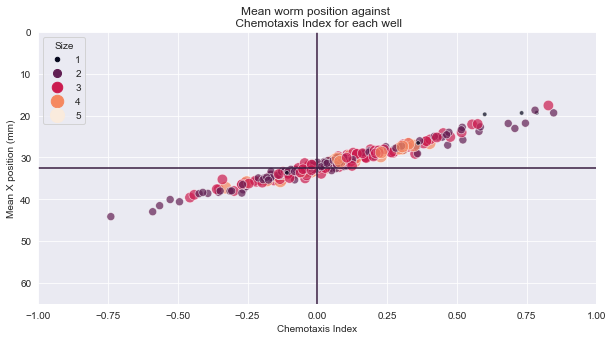

In [43]:

sb.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
sb.scatterplot(metadata['Chemotaxis'], metadata['Mean X mm'], ax=ax, size=metadata['Size'],
    sizes=(20, 200), hue=metadata['Size'], alpha = .7, palette='rocket')
ax.set(ylim=(65, 0), xlim=(-1,1),xlabel='Chemotaxis Index', ylabel='Mean X position (mm)' ,title='Mean worm position against \n Chemotaxis Index for each well')
ax.axhline(32.5)
ax.axvline(0.0)

fit_results = stats.linregress(
    metadata['Chemotaxis'], metadata['Mean X mm'])
print(fit_results)

#pearson_coef, p_value = stats.pearsonr(metadata['Chemotaxis'], metadata['Mean X mm'])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

In [38]:
fig.savefig('/Volumes/LaCie/_2021_03_screen/MeanX_v_CI.png')

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


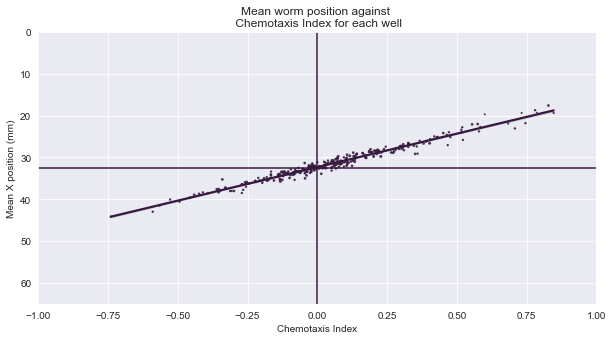

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
sb.regplot(metadata['Chemotaxis'], metadata['Mean X mm'], ax=ax, scatter_kws={'s':metadata['Size']})
ax.set(ylim=(65, 0), xlim=(-1,1),xlabel='Chemotaxis Index', ylabel='Mean X position (mm)' ,title='Mean worm position against \n Chemotaxis Index for each well')
ax.axhline(32.5)
ax.axvline(0.0)

/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


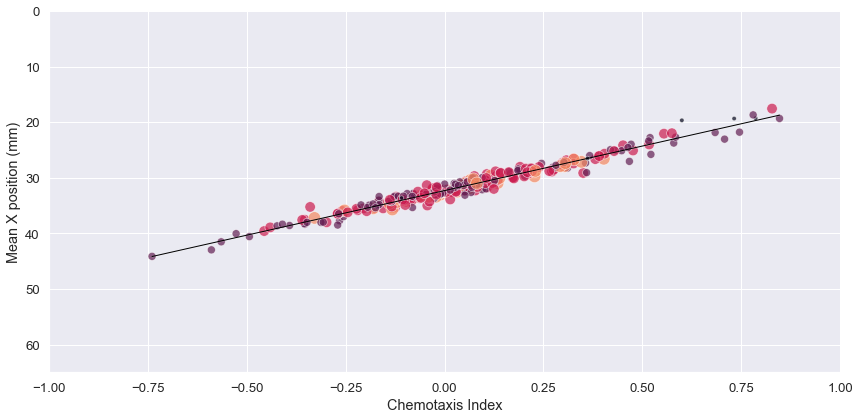

In [89]:
sb.set(font_scale=1.2)
p = sb.FacetGrid(metadata, size = 6, aspect = 2) 
p.map(sb.scatterplot, 'Chemotaxis', 'Mean X mm', palette='rocket',sizes=(20, 200),
      hue=metadata['Size'], alpha = .7, size=metadata['Size'])

p.map(sb.regplot, 'Chemotaxis', 'Mean X mm', scatter = False, ci = 0, 
    fit_reg = True, color = 'black', line_kws={'linewidth':1})
p.set(xlim = (-1, 1), xlabel='Chemotaxis Index') 
p.set(ylim = (65, 0), ylabel='Mean X position (mm)') 


/Users/emilyfryer/anaconda3/envs/neuroplant/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


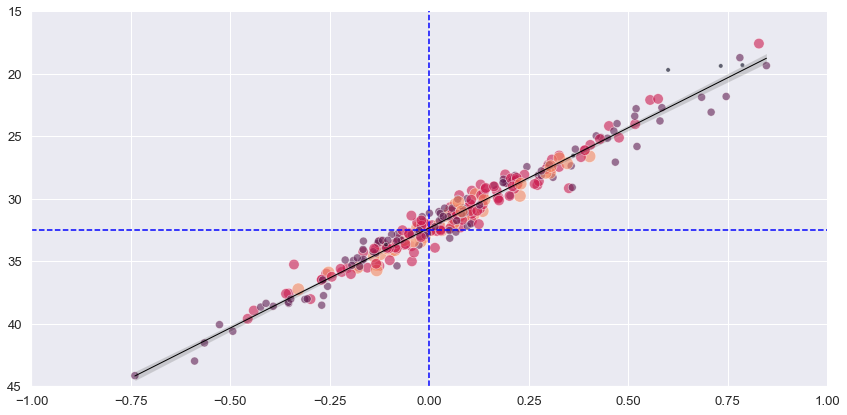

In [90]:
sb.set(font_scale=1.2)
p = sb.FacetGrid(metadata, size = 6, aspect = 2) 
p.map(sb.scatterplot, 'Chemotaxis', 'Mean X mm', palette='rocket',sizes=(20, 200),
      hue=metadata['Size'], alpha = .6, size=metadata['Size'])
p.map(sb.regplot, 'Chemotaxis', 'Mean X mm', scatter = False,
    fit_reg = True, color = 'black', line_kws={'linewidth':1})
p.set(xlim = (-1, 1), xlabel='Chemotaxis Index') 
p.set(ylim = (45, 15), ylabel='Mean X position (mm)')
p.map(plt.axhline, y=32.5, ls='--', c='blue')
p.map(plt.axvline, x=0, ls='--', c='blue')

In [87]:
p.savefig('/Volumes/LaCie/_2021_08_screen/ciXx_reg.png')

In [91]:
fit_results = stats.linregress(
    metadata['Chemotaxis'], metadata['Mean X mm'])
print(fit_results)

LinregressResult(slope=-16.01980159600708, intercept=32.31904509829671, rvalue=-0.9827857452463609, pvalue=8.381452110155066e-212, stderr=0.17807267173989005)
